In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/w266_project')
# Import custom module with helper functions
sys.path.append('/content/drive/My Drive/w266_project')
import corrstats as corr

Mounted at /content/drive
(-0.8912799047605414, 0.3749185174912557)
(1.0171097212822693, 0.3091012362386931)


### Compare BERT and sciBERT

In [3]:
#Load Bert regressor results
p = os.path.abspath('.')
results_path = os.path.join(p, 'results_csv', 'BERT_1dense_result.csv' )
bert_res_df = pd.read_csv(results_path, sep = '\t', index_col=0)

#Load sciBERT regressor results
results_path = os.path.join(p, 'results_csv', 'sciBERT_1dense_result.csv')
scibert_res_df = pd.read_csv(results_path, sep = '\t', index_col=0)

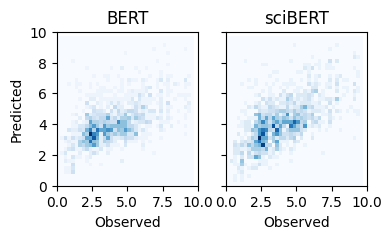

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches(w = 4, h = 2)
ax[0].hist2d(bert_res_df['Observed'], bert_res_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[0].set_title('BERT')
ax[0].set_ylabel('Predicted')
ax[0].set_xlabel('Observed')
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)

ax[1].set_title('sciBERT')
ax[1].hist2d(scibert_res_df['Observed'], scibert_res_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[1].set_xlabel('Observed')
ax[1].set_ylim(0,10)
ax[1].set_xlim(0,10)
plt.rcParams['font.size'] = 8
plt.show()

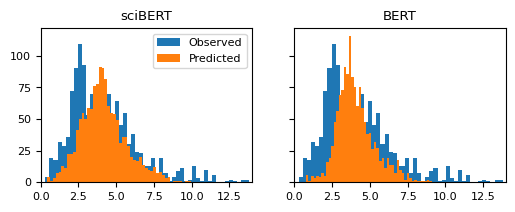

In [5]:
cut_off = 14
scibert_res_df = scibert_res_df[scibert_res_df['Observed']<cut_off]
bert_res_df = bert_res_df[bert_res_df['Observed']<cut_off]

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey=True)
fig.set_size_inches(w = 6, h = 2)
ax[0].set_title('sciBERT')
ax[0].hist(scibert_res_df['Observed'], bins = 50, label='Observed')
ax[0].hist(scibert_res_df['Predicted'], bins = 50, label='Predicted')
ax[0].set_xlim(0,cut_off)
ax[0].legend(['Observed', 'Predicted'])

ax[1].set_title('BERT')
ax[1].hist(bert_res_df['Observed'], bins = 50)
ax[1].hist(bert_res_df['Predicted'], bins = 50)
ax[1].set_xlim(0,cut_off)

plt.rcParams['font.size'] = 8
img_path = os.path.join(p, 'results_img', 'sciBERT vs BERT.png')
plt.savefig(img_path)
plt.show()

In [6]:
corr_xy = np.corrcoef(bert_res_df['Observed'], bert_res_df['Predicted'])
corr_xz = np.corrcoef(scibert_res_df['Observed'], scibert_res_df['Predicted'])
corr_yz = np.corrcoef(bert_res_df['Predicted'], scibert_res_df['Predicted'])
print(f'Corr BERT: {round(corr_xy[0,1], 4)}, corr sciBERT: {round(corr_xz[0,1], 4)}, yz:{round(corr_yz[0,1], 4)}')
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(bert_res_df), twotailed = False)
print(f'p_value for independent correlation: {round(p_value, 4)}')
_, p_value = corr.dependent_corr(corr_xy[0,1], corr_xz[0,1], corr_yz[0,1], len(bert_res_df), twotailed = False)
print(f'p_value for dependent correlation: {p_value}')

Corr BERT: 0.5712, corr sciBERT: 0.6377, yz:0.8319
p_value for independent correlation: 0.0031
p_value for dependent correlation: 2.3854178632376488e-08


### Compare various number of dense layers

In [7]:
#Load 0 dense layers
p = os.path.abspath('.')
results_path = os.path.join(p, 'results_csv', 'BERT_0dense_result.csv')
dense0_df = pd.read_csv(results_path, sep = '\t', index_col=0)
#Load 0 dense layers
p = os.path.abspath('.')
results_path = os.path.join(p, 'results_csv', 'BERT_1dense_result.csv')
dense1_df = pd.read_csv(results_path, sep = '\t', index_col=0)
#Load 0 dense layers
p = os.path.abspath('.')
results_path = os.path.join(p, 'results_csv', 'BERT_2dense_result.csv')
dense2_df = pd.read_csv(results_path, sep = '\t', index_col=0)


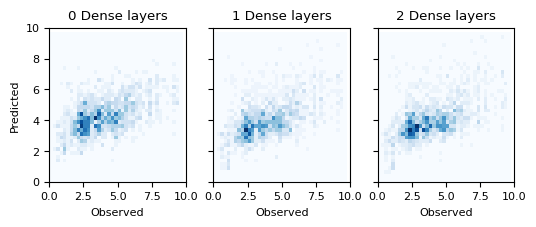

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True)
fig.set_size_inches(w = 6, h = 2)
ax[0].hist2d(dense0_df['Observed'], dense0_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[0].set_title('0 Dense layers')
ax[0].set_ylabel('Predicted')
ax[0].set_xlabel('Observed')
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)

ax[1].set_title('1 Dense layers')
ax[1].hist2d(dense1_df['Observed'], dense1_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[1].set_xlabel('Observed')
ax[1].set_ylim(0,10)
ax[1].set_xlim(0,10)

ax[2].set_title('2 Dense layers')
ax[2].hist2d(dense2_df['Observed'], dense2_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[2].set_xlabel('Observed')
ax[2].set_ylim(0,10)
ax[2].set_xlim(0,10)

plt.rcParams['font.size'] = 8
plt.show()

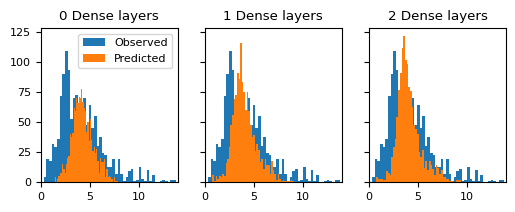

In [9]:
cut_off = 14
dense0_df = dense0_df[dense0_df['Observed']<cut_off]
dense1_df = dense1_df[dense1_df['Observed']<cut_off]
dense2_df = dense2_df[dense2_df['Observed']<cut_off]


fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey=True)
fig.set_size_inches(w = 6, h = 2)
ax[0].set_title('0 Dense layers')
ax[0].hist(dense0_df['Observed'], bins = 50, label='Observed')
ax[0].hist(dense0_df['Predicted'], bins = 50, label='Predicted')
ax[0].set_xlim(0,cut_off)
ax[0].legend(['Observed', 'Predicted'])

ax[1].set_title('1 Dense layers')
ax[1].hist(dense1_df['Observed'], bins = 50)
ax[1].hist(dense1_df['Predicted'], bins = 50)
ax[1].set_xlim(0,cut_off)

ax[2].set_title('2 Dense layers')
ax[2].hist(dense2_df['Observed'], bins = 50)
ax[2].hist(dense2_df['Predicted'], bins = 50)
ax[2].set_xlim(0,cut_off)

plt.rcParams['font.size'] = 8
img_path = os.path.join(p, 'results_img', 'Dense layers.png')
plt.savefig(img_path)
plt.show()



In [10]:
corr_xy = np.corrcoef(dense0_df['Observed'], dense0_df['Predicted'])
corr_xz = np.corrcoef(dense1_df['Observed'], dense1_df['Predicted'])
corr_yz = np.corrcoef(dense0_df['Predicted'], dense1_df['Predicted'])
print(f'Corr for 0 layers: {round(corr_xy[0,1], 4)}, Corr for 1 layers: {round(corr_xz[0,1], 4)}, yz:{round(corr_yz[0,1], 4)}')
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(dense0_df), twotailed = False)
print(f'p_value for independent correlation: {round(p_value, 4)}')
_, p_value = corr.dependent_corr(corr_xy[0,1], corr_xz[0,1], corr_yz[0,1], len(dense0_df), twotailed = False)
print(f'p_value for dependent correlation: {p_value}')

Corr for 0 layers: 0.5426, Corr for 1 layers: 0.5712, yz:0.943
p_value for independent correlation: 0.1399
p_value for dependent correlation: 7.465553488705812e-05


In [11]:
corr_xy = np.corrcoef(dense1_df['Observed'], dense1_df['Predicted'])
corr_xz = np.corrcoef(dense2_df['Observed'], dense2_df['Predicted'])
corr_yz = np.corrcoef(dense1_df['Predicted'], dense2_df['Predicted'])
print(f' Corr for 1 layer: {round(corr_xy[0,1], 4)},  Corr for 2 layers: {round(corr_xz[0,1], 4)}, yz:{round(corr_yz[0,1], 4)}')
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(dense1_df), twotailed = False)
print(f'p_value for independent correlation: {round(p_value, 4)}')
_, p_value = corr.dependent_corr(corr_xy[0,1], corr_xz[0,1], corr_yz[0,1], len(dense1_df), twotailed = False)
print(f'p_value for dependent correlation: {p_value}')

 Corr for 1 layer: 0.5712,  Corr for 2 layers: 0.5615, yz:0.9748
p_value for independent correlation: 0.3543
p_value for dependent correlation: 0.025826272334279476


### Compare sciBERT alone vs sciBert_met vs meta alone

In [12]:
#Load sciBERT w metadata
p = os.path.abspath('.')
meta_path = os.path.join(p, 'results_csv','scibert_meta.csv')
meta_w_bert_df = pd.read_csv(meta_path, sep = '\t', index_col=0)
#Load sciBert regressor with no metadata
no_meta_path = os.path.join(p, 'results_csv','sciBERT_1dense_result.csv')
nometa_df = pd.read_csv(no_meta_path, sep = '\t', index_col=0)
#Load regressor with no sciBERT
no_bert_path = os.path.join(p, 'results_csv','meta_only.csv')
nobert_df = pd.read_csv(no_bert_path, sep = '\t', index_col=0)

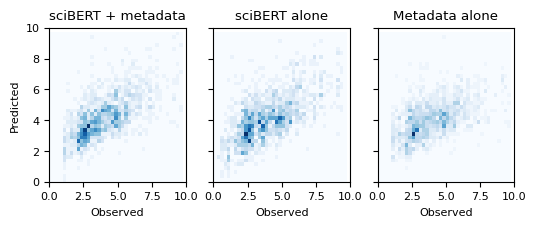

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True)
fig.set_size_inches(w = 6, h = 2)
ax[0].hist2d(meta_w_bert_df['Observed'], meta_w_bert_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[0].set_title('sciBERT + metadata')
ax[0].set_ylabel('Predicted')
ax[0].set_xlabel('Observed')
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)

ax[1].set_title('sciBERT alone')
ax[1].hist2d(nometa_df['Observed'], nometa_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[1].set_xlabel('Observed')
ax[1].set_ylim(0,10)
ax[1].set_xlim(0,10)

ax[2].set_title('Metadata alone')
ax[2].hist2d(nobert_df['Observed'], nobert_df['Predicted'], bins=(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25)), cmap = 'Blues')
ax[2].set_xlabel('Observed')
ax[2].set_ylim(0,10)
ax[2].set_xlim(0,10)

plt.rcParams['font.size'] = 8
plt.show()

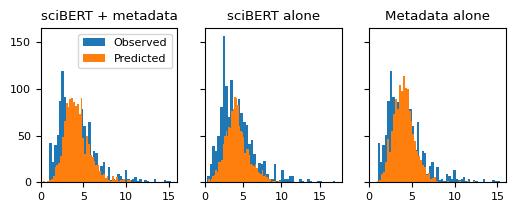

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey=True)
fig.set_size_inches(w = 6, h = 2)
ax[0].set_title('sciBERT + metadata')
ax[0].hist(meta_w_bert_df['Observed'], bins = 50, label='Observed')
ax[0].hist(meta_w_bert_df['Predicted'], bins = 50, label='Predicted')
ax[0].set_xlim(0)
ax[0].legend(['Observed', 'Predicted'])

ax[1].set_title('sciBERT alone')
ax[1].hist(nometa_df['Observed'], bins = 50)
ax[1].hist(nometa_df['Predicted'], bins = 50)
ax[1].set_xlim(0)

ax[2].set_title('Metadata alone')
ax[2].hist(nobert_df['Observed'], bins = 50)
ax[2].hist(nobert_df['Predicted'], bins = 50)
ax[2].set_xlim(0)

plt.rcParams['font.size'] = 8
img_path = os.path.join(p, 'results_img', 'sciBERT or meta or together.png')
plt.savefig(img_path)
plt.show()

In [15]:
corr_xy = np.corrcoef(nobert_df['Observed'], nobert_df['Predicted'])
corr_xz = np.corrcoef(nometa_df['Observed'], nometa_df['Predicted'])
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(nobert_df), twotailed = False)
print(f'r for meta alone: {round(corr_xy[0,1], 4)}, r for bert alone: {round(corr_xz[0,1], 4)} (p-value: {round(p_value, 4)})')

corr_xy = np.corrcoef(meta_w_bert_df['Observed'], meta_w_bert_df['Predicted'])
corr_xz = np.corrcoef(nometa_df['Observed'], nometa_df['Predicted'])
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(meta_w_bert_df), twotailed = False)
print(f'r for bert+meta: {round(corr_xy[0,1], 4)}, r for bert alone: {round(corr_xz[0,1], 4)} (p-value: {round(p_value, 4)})')

corr_xy = np.corrcoef(meta_w_bert_df['Observed'], meta_w_bert_df['Predicted'])
corr_xz = np.corrcoef(nobert_df['Observed'], nobert_df['Predicted'])
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(meta_w_bert_df), twotailed = False)
print(f'r for bert+meta: {round(corr_xy[0,1], 4)}, r for meta alone: {round(corr_xz[0,1], 4)} (p-value: {round(p_value, 10)})')

r for meta alone: 0.5518, r for bert alone: 0.6317 (p-value: 0.0008)
r for bert+meta: 0.6734, r for bert alone: 0.6317 (p-value: 0.0304)
r for bert+meta: 0.6734, r for meta alone: 0.5518 (p-value: 2.246e-07)


### Compare regular data set and augmented abstracts

In [16]:
#Load sciBERT+meta on regular dataset
p = os.path.abspath('.')
meta_path = os.path.join(p, 'results_csv','scibert_meta.csv')
regular_df = pd.read_csv(meta_path, sep = '\t', index_col=0)
#Load sciBERT+meta on augmented dataset
no_meta_path = os.path.join(p, 'results_csv','scibert_aug_new.csv')
aug_df = pd.read_csv(no_meta_path, sep = '\t', index_col=0)

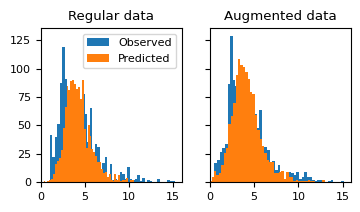

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey=True)
fig.set_size_inches(w = 4, h = 2)
ax[0].set_title('Regular data')
ax[0].hist(regular_df['Observed'], bins = 50, label='Observed')
ax[0].hist(regular_df['Predicted'], bins = 50, label='Predicted')
ax[0].set_xlim(0)
ax[0].legend(['Observed', 'Predicted'])

ax[1].set_title('Augmented data')
ax[1].hist(aug_df['Observed'], bins = 50)
ax[1].hist(aug_df['Predicted'], bins = 50)
ax[1].set_xlim(0)

plt.rcParams['font.size'] = 8


In [18]:
corr_xy = np.corrcoef(regular_df['Observed'], regular_df['Predicted'])
corr_xz = np.corrcoef(aug_df['Observed'], aug_df['Predicted'])
_, p_value = corr.independent_corr(corr_xy[0,1], corr_xz[0,1], len(aug_df), twotailed = False)
print(f'r for regular data: {round(corr_xy[0,1], 4)}, r for augmented set: {round(corr_xz[0,1], 4)} (p-value: {round(p_value, 4)})')

r for regular data: 0.6734, r for augmented set: 0.7292 (p-value: 0.0021)


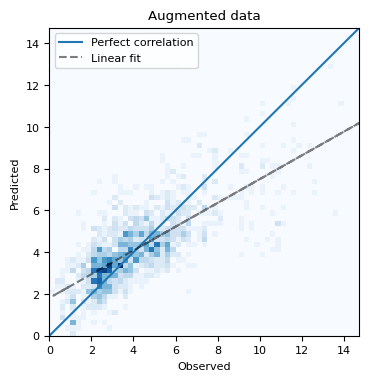

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, sharey = True)
fig.set_size_inches(w = 4, h = 4)
ax.hist2d(aug_df['Observed'], aug_df['Predicted'], bins=(np.arange(0, 15, 0.25), np.arange(0, 15, 0.25)), cmap = 'Blues')
ax.set_title('Augmented data')
ax.set_ylabel('Predicted')
ax.set_xlabel('Observed')

ax.axline((0, 0), slope=1, label="Perfect correlation")


x = aug_df['Observed']
y = aug_df['Predicted']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
# poly1d_fn is now a function which takes in x and returns an estimate for y

ax.plot(x, poly1d_fn(x), '--k', alpha = 0.5, label="Linear fit")

plt.legend(loc="upper left")

plt.rcParams['font.size'] = 8

img_path = os.path.join(p, 'results_img', 'Best model.png')
plt.savefig(img_path)
plt.show()
